# Working with numpy
    

## Stock data

First we will use the same `GDAXI.csv` file as in the previous exercise.

<div class='alert alert-block alert-info'>

We will repeat the analysis from the assignment 2 with numpy and more advance plotting: <br>
<ul>
    <li> Load all columns with prices `Open,High,Low,Close,Adj_Close` from this file to a numpy array. </li>
    <li> Take care about the first column with dates. Load it in a separate array as a string. </li>
    <li> Use build-in numpy mean function for calculating the mean values of prices in each column.</li>
    <li> Take a look at the `rolling_window()` function, which should also work with multidimensional arrays.</li>
    <li> Use `rolling_window()` function to calculate and save in additional array the rolling average for each column with the window size 10.</li>
</ul>

</div>

<div class='alert alert-warning'>
Note: <br>
<ul>
    <li>Don't forget to skip the first line with field names. You can save them separately.</li>
    <li>You know, that by reading the array using numpy it will try to use the same data types for each column/row. </li>
    <li>Now your array is multidimensional, take care about correct dimension for calculating the mean. </li>
    
</ul>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rolling_window(a, window):
    """Helper function for calculating rolling window.
    
    Arguments:
        a: numpy array, can be multidimensional;
        window (int): the width of the rolling window.
    Returns: 
        multidimensional numpy array: each element replaced by 1D arrays of values within defined window.
    """
    a=a.T
    window = int(window)
    
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides).T

Let's have a look at the beginning of the data.

In [3]:
#@solution
dates = np.genfromtxt("GDAXI.csv", delimiter=',', skip_header=1, usecols=(0),dtype='str')
prices = np.genfromtxt("GDAXI.csv", delimiter=',', skip_header=1, usecols=(1,2,3,4,5),dtype='float')
prices_mean = prices.mean(axis=0)
price_rolling_average = rolling_window(prices, 10).mean(axis=0)

<div class='alert alert-block alert-info'>

Task: <br>
<ul>
    <li>Plot your results: Use the subplots for different values. Don't forget legends and axis names.</li>
</ul>

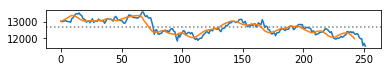

In [4]:
#@solution
# any type of plot is ok
fig = plt.figure()
ax1 = fig.add_subplot(511)

ax1.plot(prices[:,0])
ax1.plot(price_rolling_average[:,0])
ax1.axhline(prices_mean[0], color="grey", linestyle=":")

# .....

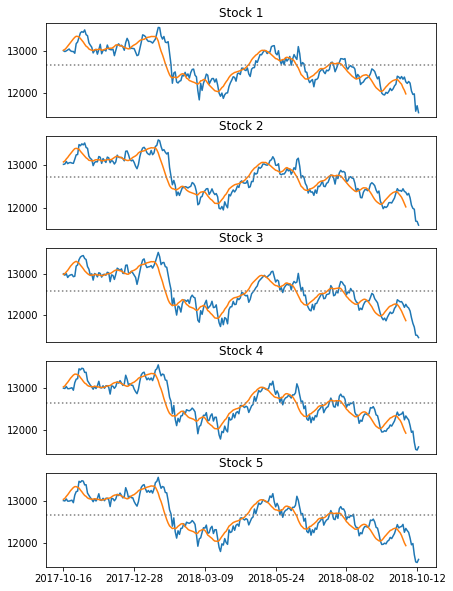

In [5]:
#@solution
# more clever way to do this
fig = plt.figure(figsize=(7,10))

n_plots = len(prices_mean)   # number of plots, 5 in this case
for i in range(n_plots):
    sp = n_plots * 100 + 10 + i + 1   # this will give us numbers like 511, 512 ...
    ax = fig.add_subplot(sp)

    ax.plot(prices[:,i])
    ax.plot(price_rolling_average[:,i])
    ax.axhline(prices_mean[i], color="grey", linestyle=":")
    
    ax.set_title("Stock {}".format(i + 1))
    
    if i == n_plots - 1:    # if this is the last subplot add dates to xticks 
        ticks = np.arange(252)[::50]  # take only each 50th date
        ax.set_xticks(ticks)
        ax.set_xticklabels(dates[ticks])
    else:
        ax.set_xticks([])

## Image Mean Filter

The mean filter is an example of a linear filter. It basically replaces each pixel in the output image with the mean (average) value of the neighborhood. This has the effect of smoothing the image (reducing the amount of intensity variations between a pixel and the next), removing noise from the image, and brightening the image.

We will use the mean calculation, which you've learned already as a mean filter to smooth the noisy image.

<div class='alert alert-block alert-info'>

Task: <br>
<ul>
    <li>Take a look at the image below.</li>
    <li>Write the smoothing filter, which will replace the value of each pixel with the mean value of neighboring pixels including the one, which will be replaced (e.g. 9 values in total for 1 neighboring pixel).</li>
    <li>Plot the result.</li>
    <li>Bonus: If everything is working, you can try to replace mean filter with median. </li>
    <li>Search into scipy library documentation for a module/function, which would do the denoising for you. </li>
</ul>


In [6]:
im_g = np.genfromtxt("cameramannoise.txt") # loading the gray-scale image as numpy array 

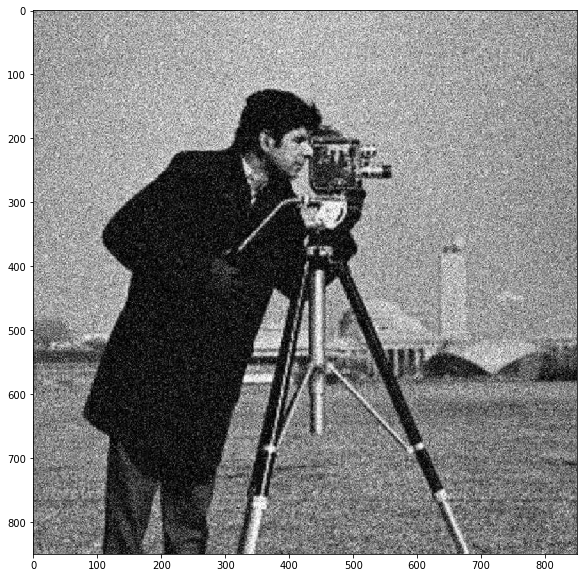

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(im_g, cmap='gray')
plt.show()

Write the smoothing function and display the output

<div class='alert alert-warning'>
Note: <br>
<ul>
    <li>Don't forget to use a nested `for` loop.</li>
    <li>You would need to select a submatrix (as in the class today) to calculate a mean. For 1 pixels neighbors it will be 9x9 submatrix. </li>
    
</ul>
</div>

In [8]:
#@solution
# advanced solution
def smooth_mean(im_g, window=1):
    window = int(window) # number of pixels arround to smooth
    smooth_img = np.zeros(im_g.shape)
    for i, rows in enumerate(im_g):
        for j, cols in enumerate(rows):
            if i >= window and i <=  im_g.shape[0]-window and j >= window and i <=  im_g.shape[1] - window:
                # taking care about adges
                smooth_img[i,j] = np.mean(im_g[i-window:i+window+1, j-window:j+window+1])
            else:
                smooth_img[i,j] = im_g[i,j]
    return smooth_img

In [9]:
#@solution
# simple also ok solution
# default value option for window is not mandatory
def smooth_mean(im_g, window=1):
    window = int(window) # number of pixels arround to smooth
    smooth_img = np.zeros(im_g.shape)
    for i, rows in enumerate(im_g):
        for j, cols in enumerate(rows):
            smooth_img[i,j] = np.mean(im_g[i-window:i+window+1, j-window:j+window+1])
    return smooth_img

/home/andrejb/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andrejb/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


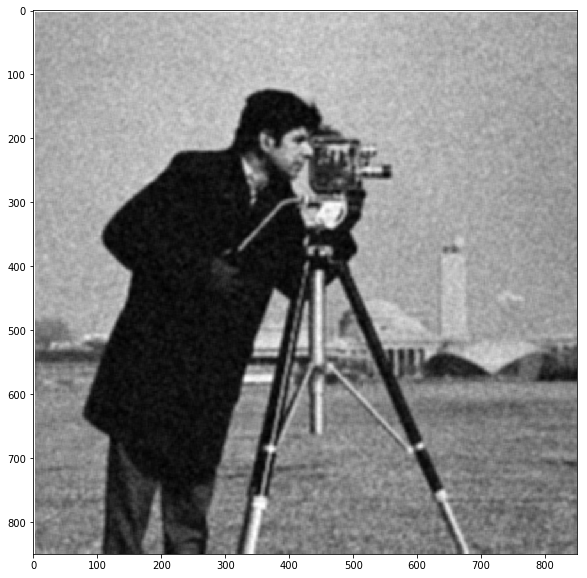

In [10]:
#@solution
plt.figure(figsize=(10,10))
plt.imshow(smooth_mean(im_g, 3), cmap='gray')
plt.show()
